<a href="https://colab.research.google.com/github/JorgeZarama/Supervisado/blob/main/Programa16_Clasificacion_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn import tree
from sklearn import datasets
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from evaluacion_funciones import *

In [8]:
seed=42

In [4]:
# Cargamos el conjunto de datos
datos_iris = datasets.load_iris()
datos_wine = datasets.load_wine()
datos_breast = datasets.load_breast_cancer()

X = {
    'IRIS': datos_iris.data,
    'WINE': datos_wine.data,
    'BREAST': datos_breast.data
}

y = {
    'IRIS': datos_iris.target,
    'WINE': datos_wine.target,
    'BREAST': datos_breast.target
}

In [5]:
# Métricas de evaluación.
metricas = {
  'ACC':    metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred, average='micro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred, average='micro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='micro')
}

In [6]:
# 1) Partición externa
# 2) Extracción de características (en caso de trabajar con imágenes)

# 3) Estandarizacion de los datos
standardizer = preprocessing.StandardScaler()
for nombre, exp in X.items():
    X[nombre] = standardizer.fit_transform(X[nombre])

# 4) Selección de atributos

In [22]:
# 5) Construcción del algoritmo de aprendizaje.
algoritmos = {'DT': tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=seed)}

In [23]:
# 5.1) Validación cruzada interna y Optimización de los hiperparámetros
y_pred = {}
for nombre, exp in X.items():
    y_pred[nombre] = cross_val_predict(algoritmos['DT'], X[nombre], y[nombre],
                                       cv=KFold(n_splits=5, shuffle=True, random_state=seed))

In [24]:
# Mostramos el resultado de varias métricas
results={}
for nombre, exp in X.items():
    results[nombre] = evaluacion(y[nombre], y_pred[nombre], metricas)
    print("Matriz de confusión (%s):\n%s" % (nombre, metrics.confusion_matrix(y[nombre], y_pred[nombre])))
    print("Tabla de métricas (%s):\n%s" % (nombre, metrics.classification_report(y[nombre], y_pred[nombre], digits=3)))

Matriz de confusión (IRIS):
[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]
Tabla de métricas (IRIS):
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      0.922     0.940     0.931        50
           2      0.939     0.920     0.929        50

    accuracy                          0.953       150
   macro avg      0.953     0.953     0.953       150
weighted avg      0.953     0.953     0.953       150

Matriz de confusión (WINE):
[[57  2  0]
 [ 5 64  2]
 [ 1  3 44]]
Tabla de métricas (WINE):
              precision    recall  f1-score   support

           0      0.905     0.966     0.934        59
           1      0.928     0.901     0.914        71
           2      0.957     0.917     0.936        48

    accuracy                          0.927       178
   macro avg      0.930     0.928     0.928       178
weighted avg      0.928     0.927     0.927       178

Matriz de confusión (BREAST):
[[192  20]
 [ 15 342]]
Tab

/content/evaluacion_funciones.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,


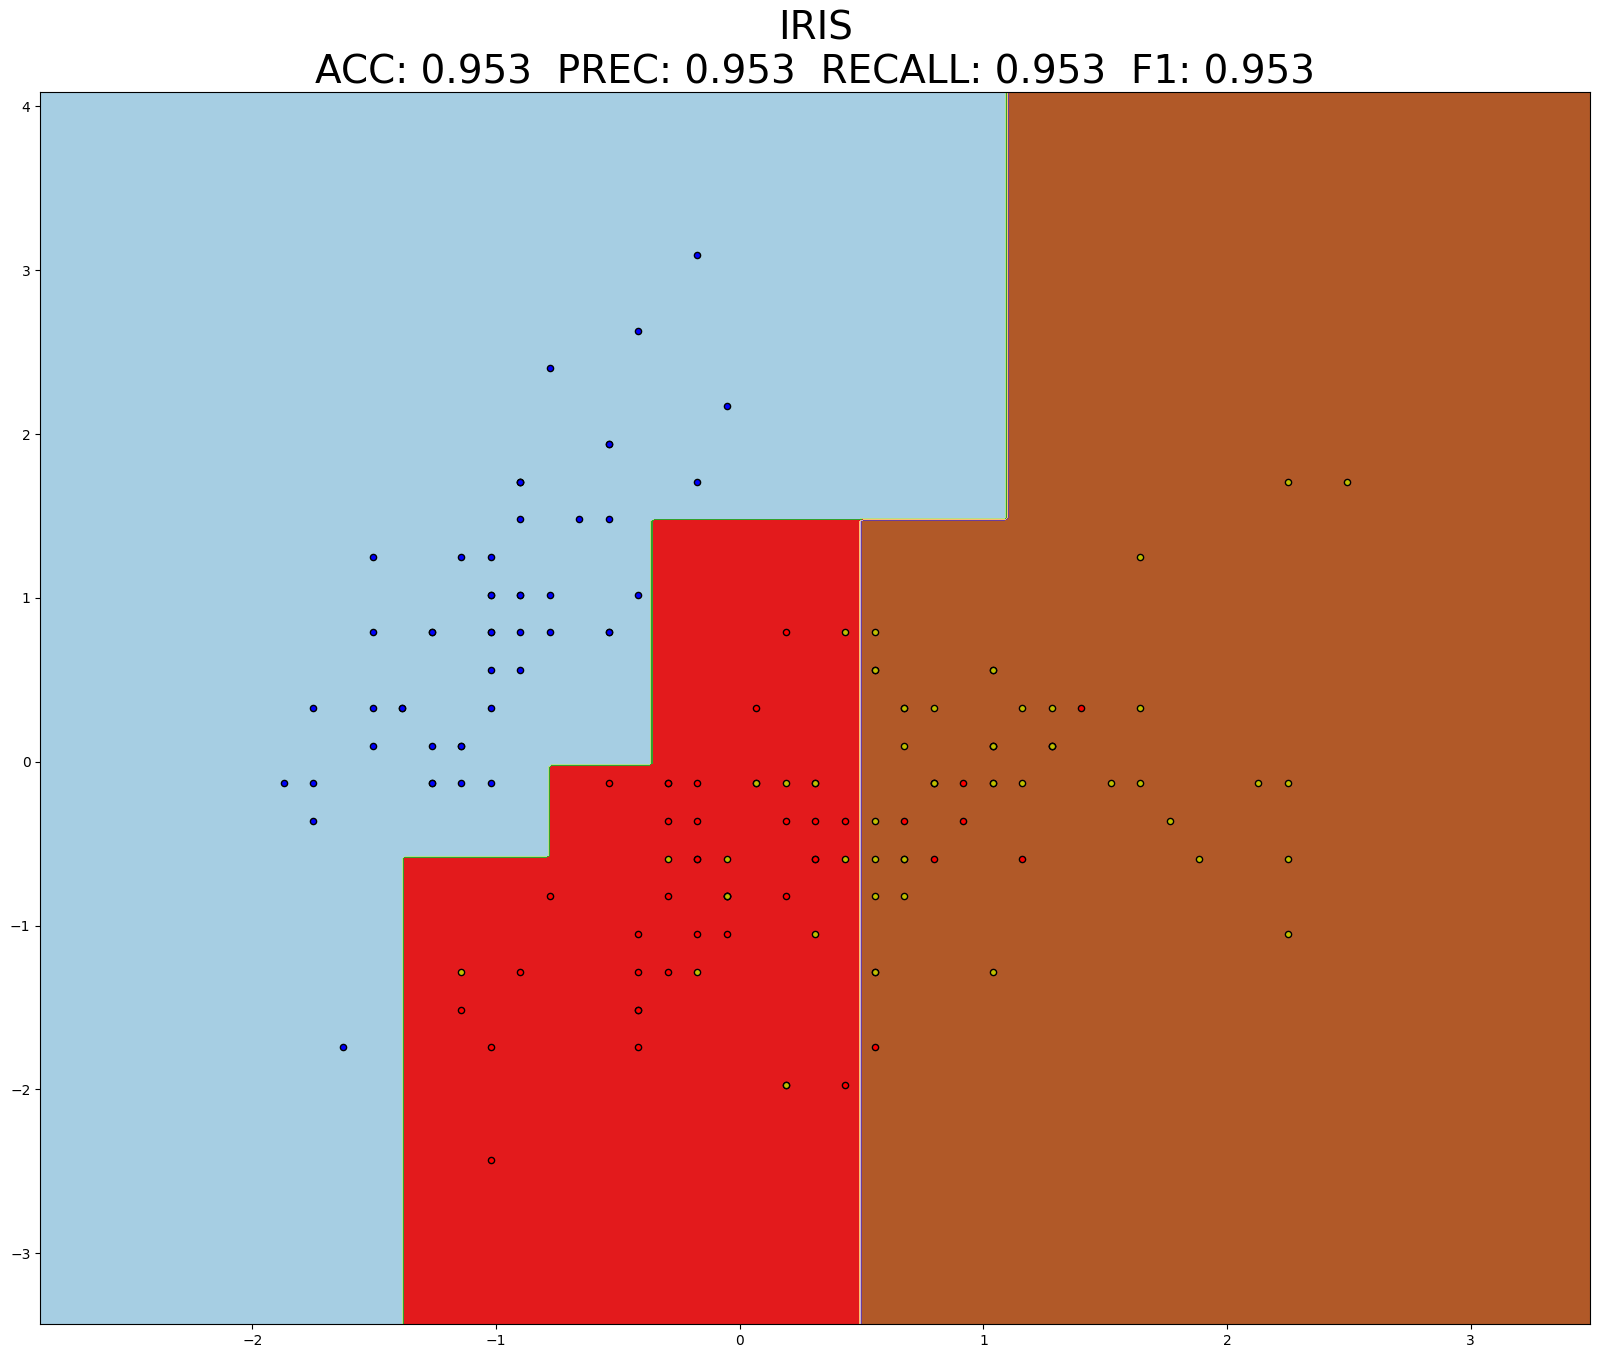

/content/evaluacion_funciones.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,


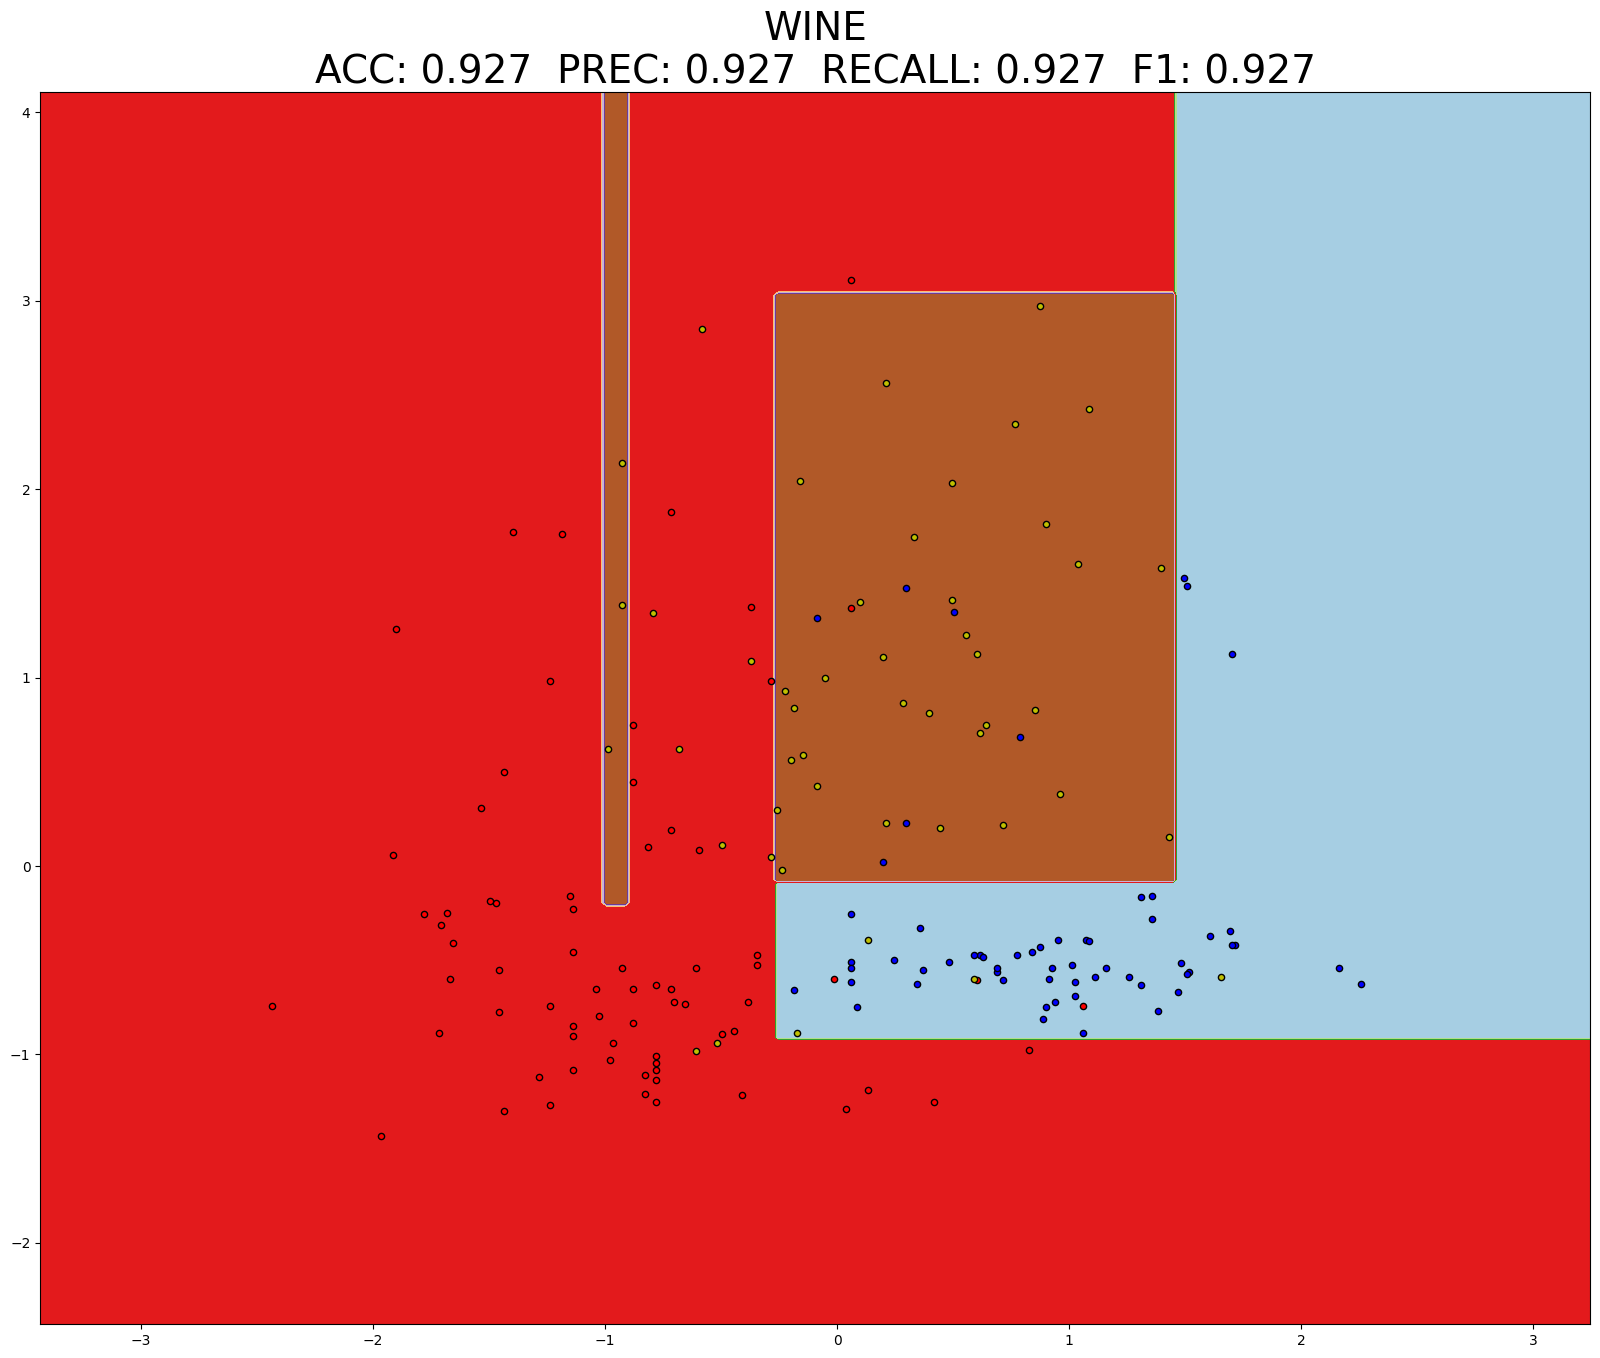

/content/evaluacion_funciones.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,


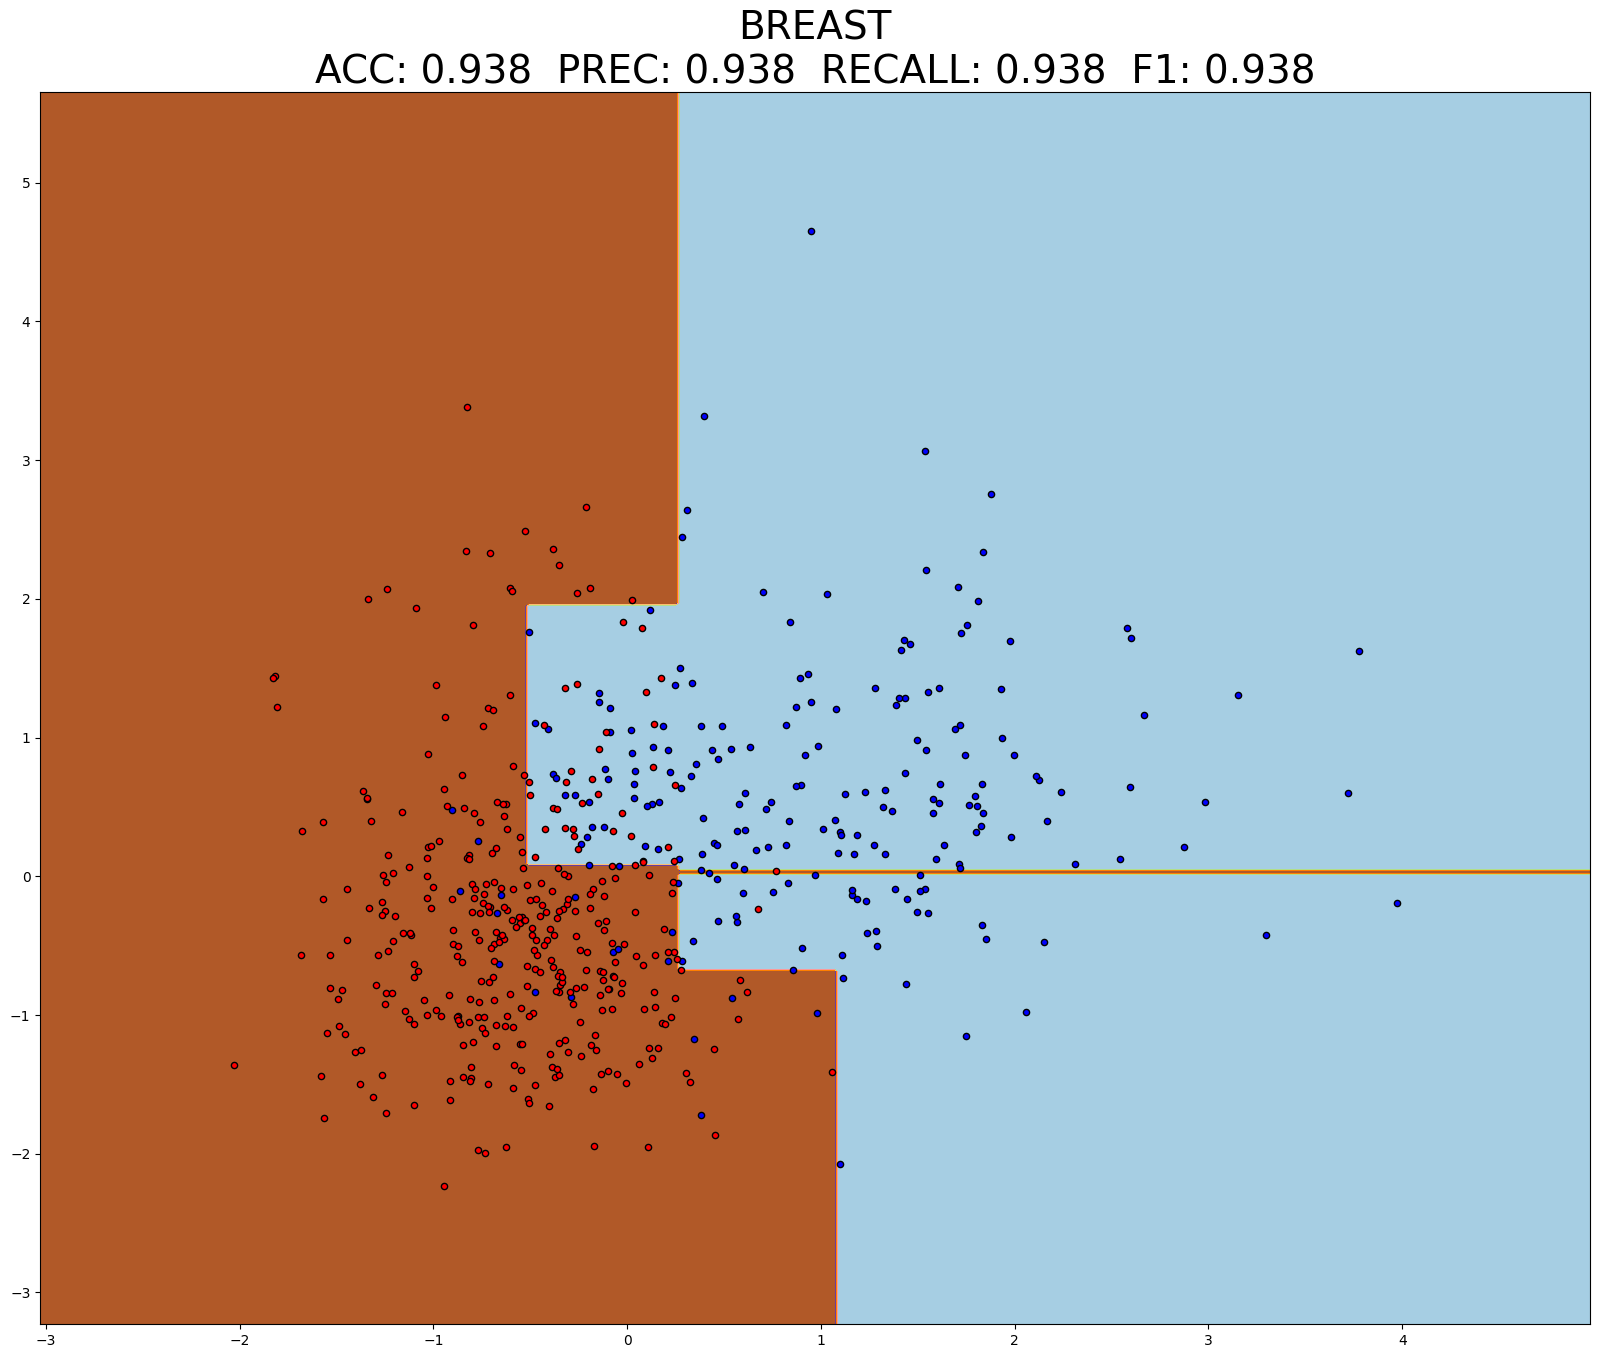

In [25]:
# 5.2) Entrenamiento del modelo definitivo (usamos 2 atributos para poder obtener gráficos en 2D)
for nombre, exp in X.items():
    modelo_definitivo = algoritmos['DT'].fit(X[nombre][:,:2], y[nombre])
    mapa_modelo_clasif_2d(X[nombre][:,:2], y[nombre], modelo_definitivo, results[nombre], nombre)

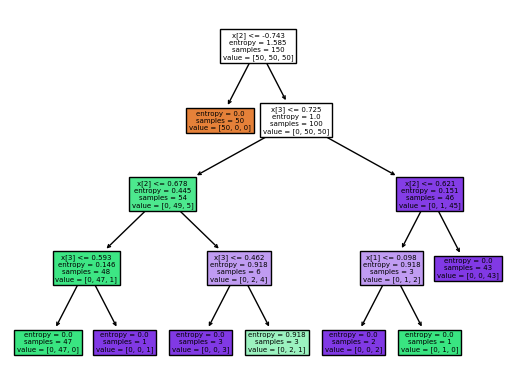

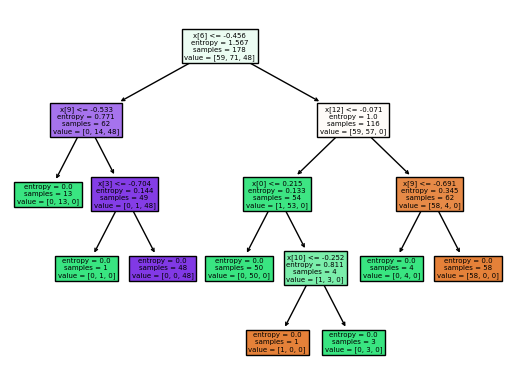

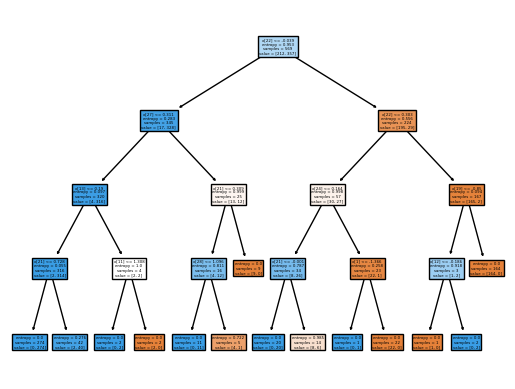

In [26]:
# 5.3) Ploteamos el árbol con todos los datos para visualización árbol.
for nombre, exp in X.items():
    modelo_completo = algoritmos['DT'].fit(X[nombre], y[nombre])
    plt.figure()
    tree.plot_tree(modelo_completo,filled=True)
    plt.savefig('tree_' + nombre + '.pdf',format='pdf',bbox_inches = "tight")